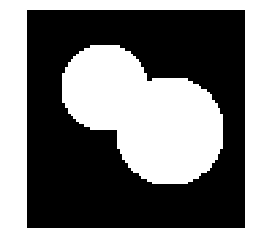

In [2]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import numpy as np
import matplotlib.pyplot as plt

# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)
plt.imsave('imagetest.png', image)
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

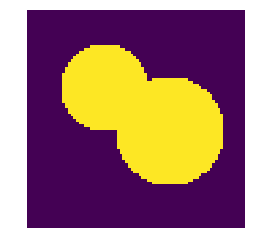

(80, 80, 4)

In [6]:
img = plt.imread('imagetest.png')
plt.imshow(img)
plt.axis('off')
plt.show()
img.shape

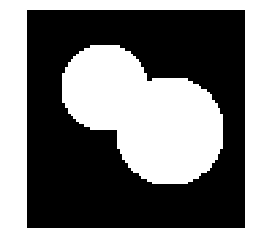

In [10]:
image2 = image.astype(float)
plt.imshow(image2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [30]:
image2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

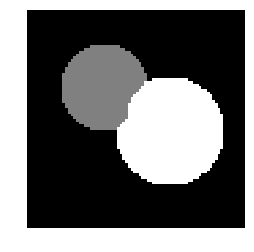

In [11]:
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
from skimage import morphology
from scipy import ndimage
distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = morphology.label(local_maxi)
labels_ws = watershed(-distance, markers, mask=image)
plt.imshow(labels_ws, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [9]:
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
from skimage import morphology
from scipy import ndimage
distance = ndimage.distance_transform_edt(image2)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image2)
markers = morphology.label(local_maxi)
labels_ws = watershed(-distance, markers, mask=image2)
plt.imshow(labels_ws, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

NameError: name 'image2' is not defined

In [12]:
from skimage import segmentation
# Transform markers image so that 0-valued pixels are to
# be labelled, and -1-valued pixels represent background
markers[~img] = -1
labels_rw = segmentation.random_walker(img, markers)
plt.imshow(labels_rw, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [21]:
labels_rw

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ..., 
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

In [24]:
image
np.savetxt('imagebool.out', image, delimiter=',')

In [23]:
image.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
image.shape

(80, 80)